In [1]:
import numpy as np

In [2]:
sample1=np.load('input100sample50.npz')
sample2=np.load('input100sample60.npz')
sample3=np.load('input100sample70.npz')
sample4=np.load('input100sample80.npz')
sample5=np.load('input100sample90.npz')
sample6=np.load('input100sample100.npz')
sample7=np.load('input100sample110.npz')
sample8=np.load('input100sample120.npz')
sample9=np.load('input100sample130.npz')
sample10=np.load('input100sample140.npz')

In [3]:
sample1['std_w1_list']

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

In [4]:
sample_list = [sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8, sample9, sample10]

In [5]:
w1_sample_list = []
w2_sample_list = []
w1_sample_acc_list = []
w2_sample_acc_list = []

for sample in sample_list:
    w1_list = []
    w2_list = []
    w1_acc_list = []
    w2_acc_list = []
    
    for w1, w2, acc in zip(sample['std_w1_list'], sample['std_w2_list'], sample['acc_list']):
        w1_list.append(w1)
        w2_list.append(w2)
        w1_acc_list.append(acc)
        w2_acc_list.append(acc)

    w1_sample_list.append(w1_list)
    w2_sample_list.append(w2_list)
    w1_sample_acc_list.append(w1_acc_list)
    w2_sample_acc_list.append(w2_acc_list)

In [6]:
sample_w1_list = np.array(w1_sample_list).T
sample_w2_list = np.array(w2_sample_list).T
w1_acc_sample_list = np.array(w1_sample_acc_list).T
w2_acc_sample_list = np.array(w2_sample_acc_list).T

In [7]:
average_w1_list = []
average_acc_list = []
for w1_sample, w1_acc_sample in zip(sample_w1_list,w1_acc_sample_list):
    average_w1 = np.mean(w1_sample)
    average_acc = np.mean(w1_acc_sample)

    average_w1_list.append(average_w1) 
    average_acc_list.append(average_acc)

best_std_index = np.argmax(average_acc_list)
mean_std_w1 = average_w1_list[best_std_index]
print(average_acc_list)

[0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.664453125, 0.698828125, 0.67890625, 0.687109375, 0.67265625, 0.6703125, 0.670703125, 0.669921875, 0.66171875, 0.4921875, 0.840234375, 0.83828125, 0.83125, 0.825390625, 0.82265625, 0.82265625, 0.823828125, 0.81796875, 0.7984375, 0.4921875, 0.82421875, 0.819921875, 0.84375, 0.824609375, 0.810546875, 0.816796875, 0.815625, 0.81484375, 0.82265625, 0.4921875, 0.808984375, 0.803125, 0.801171875, 0.8015625, 0.78671875, 0.78671875, 0.7890625, 0.794140625, 0.7953125, 0.4921875, 0.7875, 0.77890625, 0.764453125, 0.765234375, 0.758984375, 0.755078125, 0.758984375, 0.75703125, 0.760546875, 0.4921875, 0.77421875, 0.761328125, 0.750390625, 0.747265625, 0.73125, 0.741015625, 0.736328125, 0.73515625, 0.727734375, 0.4921875, 0.758984375, 0.753125, 0.743359375, 0.727734375, 0.723828125, 0.725390625, 0.72265625, 0.723828125, 0.71953125, 0.4921875, 0.7359375, 0.7296875, 0.728515625, 0

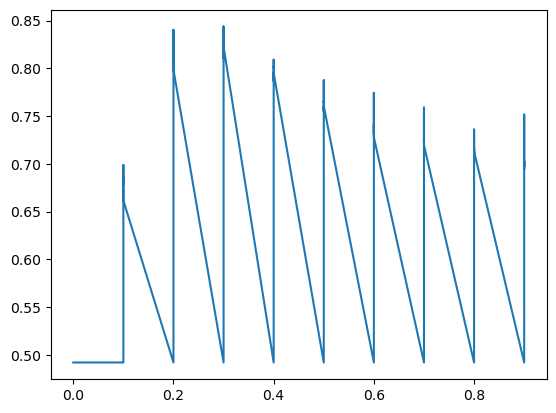

In [37]:
import matplotlib.pyplot as plt

plt.plot(average_w1_list, average_acc_list)

In [9]:
average_w2_list = []
average_acc_list = []
for w2_sample, w2_acc_sample in zip(sample_w2_list,w2_acc_sample_list):
    average_w2 = np.mean(w2_sample)
    average_acc = np.mean(w2_acc_sample)

    average_w2_list.append(average_w2) 
    average_acc_list.append(average_acc)

best_std_index = np.argmax(average_acc_list)
mean_std_w2 = average_w2_list[best_std_index]
print(average_acc_list)

[0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.4921875, 0.664453125, 0.698828125, 0.67890625, 0.687109375, 0.67265625, 0.6703125, 0.670703125, 0.669921875, 0.66171875, 0.4921875, 0.840234375, 0.83828125, 0.83125, 0.825390625, 0.82265625, 0.82265625, 0.823828125, 0.81796875, 0.7984375, 0.4921875, 0.82421875, 0.819921875, 0.84375, 0.824609375, 0.810546875, 0.816796875, 0.815625, 0.81484375, 0.82265625, 0.4921875, 0.808984375, 0.803125, 0.801171875, 0.8015625, 0.78671875, 0.78671875, 0.7890625, 0.794140625, 0.7953125, 0.4921875, 0.7875, 0.77890625, 0.764453125, 0.765234375, 0.758984375, 0.755078125, 0.758984375, 0.75703125, 0.760546875, 0.4921875, 0.77421875, 0.761328125, 0.750390625, 0.747265625, 0.73125, 0.741015625, 0.736328125, 0.73515625, 0.727734375, 0.4921875, 0.758984375, 0.753125, 0.743359375, 0.727734375, 0.723828125, 0.725390625, 0.72265625, 0.723828125, 0.71953125, 0.4921875, 0.7359375, 0.7296875, 0.728515625, 0

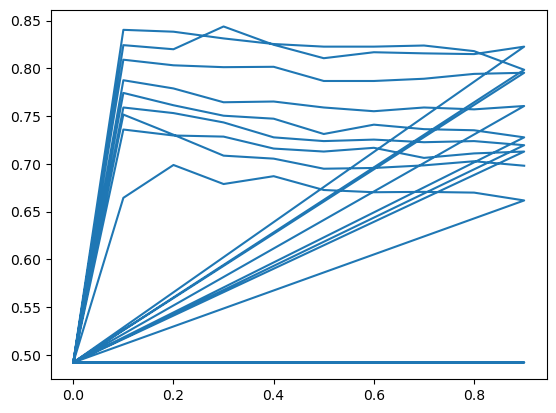

In [38]:
plt.plot(average_w2_list, average_acc_list)

In [41]:
np.array(average_acc_list).shape

(100,)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])